# Setup

## Look around

In [1]:
%ls

colab_extended_grid_search_pipeline.ipynb
colab_reproducing_grid_search_pipeline.ipynb
colab_reproducing_rf_ci.ipynb
eda.ipynb
visualise_extended_grid_search_results.ipynb
visualise_reproducing_grid_search_results.ipynb


In [2]:
%ls ../results/

esol_original_extended_random_search_best_params.pickle
esol_original_extended_random_search_best_params_with_MolLogP.pickle
esol_original_extended_random_search_best_train_test_scores.pickle
esol_original_extended_random_search_best_train_test_scores_with_MolLogP.pickle
esol_original_extended_random_search_best_val_scores.pickle
esol_original_extended_random_search_best_val_scores_with_MolLogP.pickle
esol_original_extended_random_search_grid_params.pickle
esol_original_reproducing_random_search_best_params.pickle
esol_original_reproducing_random_search_best_train_test_scores.pickle
esol_original_reproducing_random_search_best_val_scores.pickle
esol_original_reproducing_random_search_grid_params.pickle
freesolv_original_extended_random_search_best_params.pickle
freesolv_original_extended_random_search_best_train_test_scores.pickle
freesolv_original_extended_random_search_best_val_scores.pickle
freesolv_original_extended_random_search_grid_params.pickle
freesolv_original_reproducing_ran

## Import Modules

### Standard imports

In [28]:
import json
import pickle

import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Custom imports

In [29]:
sys.path.insert(0, '..')

# plotting
from util_scripts.plotting_functions_and_vars import datasets_to_titles, datasets_to_units, metrics_to_labels
from util_scripts.plotting_functions_and_vars import FIGSIZE, PLOTS_DIR

sys.path.insert(0, './notebooks')

## CHOOSE dataset, smile_type, grid_search_type to visualize

In [30]:
# root = '../backup_results'
root = '../results'

In [31]:
dataset = 'freesolv'
assert dataset in ['freesolv', 'esol', 'lipophilicity']

smile_type = 'original'
assert smile_type in ['original', 'protonated']

grid_search_type = 'extended'
assert grid_search_type in ['reproducing', 'extended']

## Titles, Units and Labels for datasets

In [32]:
for key, value in datasets_to_titles.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

freesolv      :  Solvation Energy
esol          :  Log Solubility
lipophilicity :  Octanol/Water Distribution Coefficient


In [33]:
for key, value in datasets_to_units.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

freesolv      :  (kcal/mol)
esol          :  (mol/litre)
lipophilicity :  (logD)


In [35]:
for key, value in metrics_to_labels.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

RMSE          :  root-mean-square error
MAE           :  mean absolute error
R^2           :  R^2 (coefficient of determination)
pearson_r     :  Pearson correlation


## CHOOSE metric to display

In [37]:
metric = 'RMSE'
assert metric in metrics_to_labels

In [38]:
if metric in ['RMSE', 'MAE']:
    pass
else:
    # no units
    datasets_to_units = {'freesolv': '', 'esol': '', 'lipophilicity': ''}

## Load everything

In [39]:
%ls ../results/

esol_original_extended_random_search_best_params.pickle
esol_original_extended_random_search_best_params_with_MolLogP.pickle
esol_original_extended_random_search_best_train_test_scores.pickle
esol_original_extended_random_search_best_train_test_scores_with_MolLogP.pickle
esol_original_extended_random_search_best_val_scores.pickle
esol_original_extended_random_search_best_val_scores_with_MolLogP.pickle
esol_original_extended_random_search_grid_params.pickle
esol_original_reproducing_random_search_best_params.pickle
esol_original_reproducing_random_search_best_train_test_scores.pickle
esol_original_reproducing_random_search_best_val_scores.pickle
esol_original_reproducing_random_search_grid_params.pickle
freesolv_original_extended_random_search_best_params.pickle
freesolv_original_extended_random_search_best_train_test_scores.pickle
freesolv_original_extended_random_search_best_val_scores.pickle
freesolv_original_extended_random_search_grid_params.pickle
freesolv_original_reproducing_ran

In [40]:
with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_best_val_scores.pickle', 'rb') as fp:
    val_scores = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_best_train_test_scores.pickle', 'rb') as fp:
    train_test_scores = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_best_params.pickle', 'rb') as fp:
    best_params = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_grid_params.pickle', 'rb') as fp:
    params = pickle.load(fp)

In [41]:
best_params

{'RDKit': {'rf': {'rf__n_estimators': 150, 'rf__max_features': 0.8},
  'xgb': {'xgb__subsample': 1,
   'xgb__n_estimators': 200,
   'xgb__max_depth': 3,
   'xgb__learning_rate': 0.1},
  'krr': {'krr__alpha': 0.01},
  'gp': {'gp__kernel': RBF(length_scale=1) + WhiteKernel(noise_level=1)}},
 '1024ecfp-4': {'rf': {'rf__n_estimators': 1000, 'rf__max_features': 0.8},
  'xgb': {'xgb__subsample': 0.5,
   'xgb__n_estimators': 200,
   'xgb__max_depth': 3,
   'xgb__learning_rate': 0.3},
  'krr': {'krr__alpha': 0.001},
  'gp': {'gp__kernel': Matern(length_scale=1, nu=1.5) + WhiteKernel(noise_level=1)}},
 '1024ecfp-6': {'rf': {'rf__n_estimators': 950, 'rf__max_features': 0.4},
  'xgb': {'xgb__subsample': 0.5,
   'xgb__n_estimators': 200,
   'xgb__max_depth': 5,
   'xgb__learning_rate': 0.1},
  'krr': {'krr__alpha': 0.01},
  'gp': {'gp__kernel': DotProduct(sigma_0=1) + WhiteKernel(noise_level=1)}},
 '2048ecfp-4': {'rf': {'rf__n_estimators': 1000, 'rf__max_features': 0.8},
  'xgb': {'xgb__subsample'

Have a look at best parameters.

In [42]:
best_params['1024ecfp-4']

{'rf': {'rf__n_estimators': 1000, 'rf__max_features': 0.8},
 'xgb': {'xgb__subsample': 0.5,
  'xgb__n_estimators': 200,
  'xgb__max_depth': 3,
  'xgb__learning_rate': 0.3},
 'krr': {'krr__alpha': 0.001},
 'gp': {'gp__kernel': Matern(length_scale=1, nu=1.5) + WhiteKernel(noise_level=1)}}

Have a look at the scores

In [43]:
val_scores

{'RDKit': {'rf': {'fit_time': array([3.00405955, 2.99300003, 2.01390004]),
   'score_time': array([0.02175236, 0.0229032 , 0.01124597]),
   'test_RMSE': array([-1.01521963, -1.51672152, -1.42346167]),
   'test_MAE': array([-0.64681093, -0.64188186, -0.80450229]),
   'test_R^2': array([0.92499214, 0.87317632, 0.87101185]),
   'test_pearson_r': array([0.96253892, 0.93800403, 0.93685263])},
  'xgb': {'fit_time': array([0.88848615, 0.88384438, 0.53892207]),
   'score_time': array([0.00482535, 0.00522637, 0.00337338]),
   'test_RMSE': array([-0.81269396, -1.12685136, -1.1197045 ]),
   'test_MAE': array([-0.56259009, -0.54054731, -0.64824417]),
   'test_R^2': array([0.95193369, 0.92999615, 0.92018857]),
   'test_pearson_r': array([0.97571109, 0.96627966, 0.95935152])},
  'krr': {'fit_time': array([0.08024168, 0.04654336, 0.03478789]),
   'score_time': array([0.01254249, 0.00744128, 0.00464535]),
   'test_RMSE': array([-1.99372789, -1.58053812, -2.06821669]),
   'test_MAE': array([-1.04416167

In [44]:
train_test_scores

{'RDKit': {'rf': {'fit_time': array([3.43255973, 3.42291117, 2.28692842]),
   'score_time': array([0.02155113, 0.02122998, 0.01166892]),
   'test_RMSE': array([-0.98094876, -1.11189948, -1.26614108]),
   'train_RMSE': array([-0.43123807, -0.44446978, -0.43131828]),
   'test_MAE': array([-0.68070209, -0.60835764, -0.62884731]),
   'train_MAE': array([-0.24242985, -0.24846293, -0.24871736]),
   'test_R^2': array([0.95397469, 0.93174972, 0.87272333]),
   'train_R^2': array([0.98680406, 0.98628784, 0.98761977]),
   'test_pearson_r': array([0.97970865, 0.96848973, 0.93425752]),
   'train_pearson_r': array([0.99409447, 0.99392296, 0.99437087])},
  'xgb': {'fit_time': array([0.98744035, 1.00240755, 0.61402965]),
   'score_time': array([0.00466943, 0.00489664, 0.00347257]),
   'test_RMSE': array([-0.78106279, -0.78147749, -1.19489098]),
   'train_RMSE': array([-0.27473153, -0.27423827, -0.27478457]),
   'test_MAE': array([-0.55109656, -0.51757116, -0.61344719]),
   'train_MAE': array([-0.20484

Get the means over folds (cross_validate records the results as arrays even for one fold)

In [45]:
mean_val_scores = {features: {model: {record: np.abs(val_scores[features][model][record].mean()) for record in val_scores[features][model]} for model in val_scores[features]} for features in val_scores}
mean_train_test_scores = {features: {model: {record: np.abs(train_test_scores[features][model][record].mean()) for record in train_test_scores[features][model]} for model in train_test_scores[features]} for features in train_test_scores}

mean_train_test_scores

{'RDKit': {'rf': {'fit_time': 3.047466437021891,
   'score_time': 0.01815001169840495,
   'test_RMSE': 1.1196631080934496,
   'train_RMSE': 0.435675375652185,
   'test_MAE': 0.6393023467643466,
   'train_MAE': 0.24653671645896957,
   'test_R^2': 0.9194825814074489,
   'train_R^2': 0.9869038903435009,
   'test_pearson_r': 0.9608186316481967,
   'train_pearson_r': 0.9941294321289837},
  'xgb': {'fit_time': 0.867959181467692,
   'score_time': 0.004346211751302083,
   'test_RMSE': 0.9191437566741985,
   'train_RMSE': 0.27458478957632587,
   'test_MAE': 0.560704969779039,
   'train_MAE': 0.20700811492852708,
   'test_R^2': 0.9412506025187541,
   'train_R^2': 0.9947997812429854,
   'test_pearson_r': 0.9703200868214336,
   'train_pearson_r': 0.9974516280841984},
  'krr': {'fit_time': 0.04656322797139486,
   'score_time': 0.006793816884358724,
   'test_RMSE': 1.9033775061765021,
   'train_RMSE': 0.12286728875507481,
   'test_MAE': 0.8769340342731987,
   'train_MAE': 0.0794475559737135,
   'tes

In [46]:
std_val_scores = {features: {model: {record: val_scores[features][model][record].std() for record in val_scores[features][model]} for model in val_scores[features]} for features in val_scores}
std_train_test_scores = {features: {model: {record: train_test_scores[features][model][record].std() for record in train_test_scores[features][model]} for model in train_test_scores[features]} for features in train_test_scores}

std_val_scores

{'RDKit': {'rf': {'fit_time': 0.46418087467457614,
   'score_time': 0.005245102567031642,
   'test_RMSE': 0.21778253843920686,
   'test_MAE': 0.07552502703368312,
   'test_R^2': 0.024952033362263572,
   'test_pearson_r': 0.011846573705473295},
  'xgb': {'fit_time': 0.16370297791449073,
   'score_time': 0.0007960039396165939,
   'test_RMSE': 0.14643975559197284,
   'test_MAE': 0.046453224729167,
   'test_R^2': 0.013271508940687295,
   'test_pearson_r': 0.006704777183078979},
  'krr': {'fit_time': 0.019263709483980453,
   'score_time': 0.0032694602023752737,
   'test_RMSE': 0.21450324002086973,
   'test_MAE': 0.15565879576305525,
   'test_R^2': 0.06779926586479496,
   'test_pearson_r': 0.030269050313210547},
  'gp': {'fit_time': 0.24731999367316315,
   'score_time': 0.0018120860326011554,
   'test_RMSE': 0.21489462930585113,
   'test_MAE': 0.07220832637005795,
   'test_R^2': 0.025068805068509264,
   'test_pearson_r': 0.012261824959628258}},
 '1024ecfp-4': {'rf': {'fit_time': 3.4540504568

In [47]:
mean_val_scores.keys()

dict_keys(['RDKit', '1024ecfp-4', '1024ecfp-6', '2048ecfp-4', '2048ecfp-6', '1024ecfp-4 + RDKit', '1024ecfp-6 + RDKit', '2048ecfp-4 + RDKit', '2048ecfp-6 + RDKit'])

# Visualization

## Plotting options

In [48]:
column_order = ['RDKit',
                '1024ecfp-4', '1024ecfp-4 + RDKit',
                '1024ecfp-6', '1024ecfp-6 + RDKit',
                '2048ecfp-4', '2048ecfp-4 + RDKit',
                '2048ecfp-6', '2048ecfp-6 + RDKit'
                ]

row_order = ['Random Forest', 'XGBoost', 'Kernel Ridge', 'Gaussian Process']
mapper = {
    'rf': 'Random Forest',
    'xgb': 'XGBoost',
    'krr': 'Kernel Ridge',
    'gp': 'Gaussian Process'
}

## Train metric

In [49]:
## pull out train scores for all features for all models (train set is the train set when working on train/test split )
train_metric = pd.DataFrame({features: {model: mean_train_test_scores[features][model][f'train_{metric}'] for model in mean_train_test_scores[features]} for features in mean_train_test_scores})

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
train_metric.round(2)

RMSE : root-mean-square error , unit: (kcal/mol)


,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,0.44,0.74,0.77,0.75,0.76,0.43,0.44,0.44,0.44
xgb,0.27,0.67,0.68,0.14,1.04,0.12,0.12,0.11,0.12
krr,0.12,0.05,0.10,0.08,0.07,0.02,0.02,0.02,0.02
gp,1.05,3.32,0.02,0.09,0.02,0.03,0.02,0.03,0.02


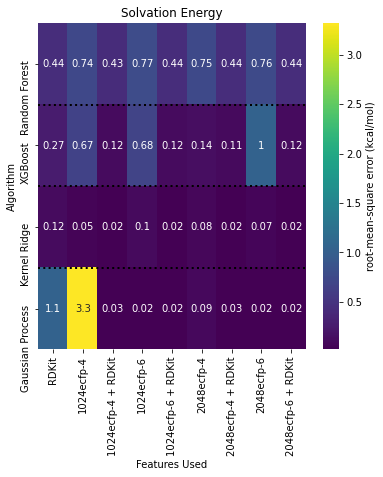

In [68]:
df = train_metric.round(2)
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]

fig, ax = plt.subplots(1,1,figsize=FIGSIZE)

# heatmap
sns.heatmap(df, annot=True, cmap='viridis',
            cbar_kws={'label': r"{} {}".format(metrics_to_labels[metric], datasets_to_units[dataset])}, ax=ax)

# horizontal lines to separate the heatmap
ax.hlines([1, 2, 3], *ax.get_xlim(), linestyle=':', linewidth=2)

# title and labels
ax.set_ylabel('Algorithm')
ax.set_xlabel('Features Used')
ax.set_title(datasets_to_titles[dataset])

# fig.savefig(f'{PLOTS_DIR}/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')
plt.show()

## Val metric

In [69]:
## pull out validation scores for all features for all models (validation set is a test set when working on train/val split )
val_metric = pd.DataFrame({features: {model: mean_val_scores[features][model][f'test_{metric}'] for model in mean_val_scores[features]} for features in mean_val_scores})

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
val_metric.round(2)

RMSE : root-mean-square error , unit: (kcal/mol)


,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,1.32,2.39,2.47,2.40,2.48,1.41,1.41,1.36,1.41
xgb,1.02,2.12,2.21,1.81,2.27,1.13,1.19,1.14,1.17
krr,1.88,3.92,4.17,3.79,4.13,3.36,3.61,3.22,3.60
gp,1.60,3.70,3.24,2.73,2.76,2.66,1.42,2.60,1.30


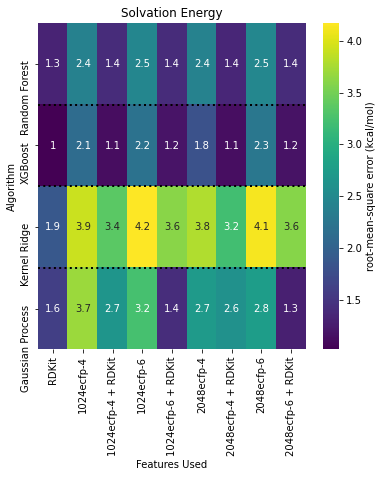

In [70]:
df = val_metric.round(2)
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]

fig, ax = plt.subplots(1,1,figsize=(6,6))

# heatmap
sns.heatmap(df, annot=True, cmap='viridis',
            cbar_kws={'label': r"{} {}".format(metrics_to_labels[metric], datasets_to_units[dataset])}, ax=ax)

# horizontal lines to separate the heatmap
ax.hlines([1, 2, 3], *ax.get_xlim(), linestyle=':', linewidth=2)

# title and labels
ax.set_ylabel('Algorithm')
ax.set_xlabel('Features Used')
ax.set_title(datasets_to_titles[dataset])

# fig.savefig(f'{PLOTS_DIR}/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')
plt.show()

## Test metric

In [71]:
## pull out validation scores for all features for all models (validation set is a test set when working on train/val split )
test_metric = pd.DataFrame({features: {model: mean_train_test_scores[features][model][f'test_{metric}'] for model in mean_train_test_scores[features]} for features in mean_train_test_scores})

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
test_metric.round(2)

RMSE : root-mean-square error , unit: (kcal/mol)


,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,1.12,2.38,2.39,2.40,2.39,1.16,1.18,1.17,1.17
xgb,0.92,2.08,2.04,1.89,2.16,0.97,1.08,1.07,1.12
krr,1.90,3.35,3.90,3.22,3.90,2.63,3.29,2.38,3.31
gp,1.59,3.85,3.30,2.55,2.34,2.13,1.28,1.94,1.35


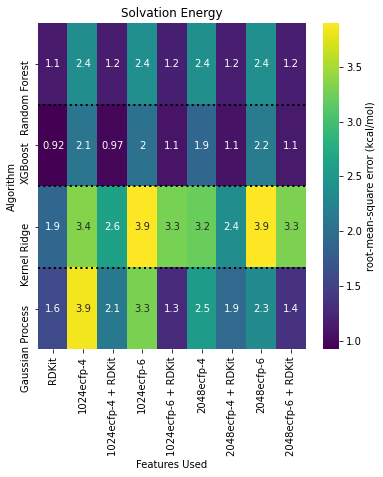

In [72]:
df = test_metric.round(2)
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]

fig, ax = plt.subplots(1,1,figsize=(6,6))

# heatmap
sns.heatmap(df, annot=True, cmap='viridis',
            cbar_kws={'label': r"{} {}".format(metrics_to_labels[metric], datasets_to_units[dataset])}, ax=ax)

# horizontal lines to separate the heatmap
ax.hlines([1, 2, 3], *ax.get_xlim(), linestyle=':', linewidth=2)

# title and labels
ax.set_ylabel('Algorithm')
ax.set_xlabel('Features Used')
ax.set_title(datasets_to_titles[dataset])


# fig.savefig(f'{PLOTS_DIR}/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')
plt.show()

# Creating a table with all the scores

## Train and test scores data frame

In [ ]:
train_test_means_df = pd.DataFrame(mean_train_test_scores['1024ecfp-4']).T
train_test_stds_df = pd.DataFrame(std_train_test_scores['1024ecfp-4']).T

train_test_stds_df

,fit_time,score_time,test_RMSE,train_RMSE,test_MAE,train_MAE,test_R^2,train_R^2,test_pearson_r,train_pearson_r
rf,3.994119,0.020552,0.443666,0.023265,0.129173,0.010599,0.059956,0.001414,0.033868,0.000632
xgb,0.681495,0.006255,0.349533,0.012556,0.179685,0.014313,0.040849,0.001578,0.025258,0.000843
krr,0.026230,0.004008,0.227742,0.000281,0.151326,0.000119,0.122404,0.000003,0.073574,0.000001
gp,0.710641,0.011309,0.362189,0.045095,0.096782,0.011048,0.027723,0.002170,0.109185,0.002956


## Validation scores data frame

### Changing col names to 'val_\*' form 'test_\*'

In [ ]:
val_means_df = pd.DataFrame(mean_val_scores['1024ecfp-4']).T
val_stds_df = pd.DataFrame(std_val_scores['1024ecfp-4']).T

val_stds_df

,fit_time,score_time,test_RMSE,test_MAE,test_R^2,test_pearson_r
rf,3.454050,0.021687,0.250018,0.092018,0.035761,0.027058
xgb,0.484046,0.001694,0.175711,0.015280,0.016002,0.010326
krr,0.028786,0.003589,0.037452,0.158623,0.092987,0.023486
gp,0.686427,0.006013,0.234522,0.088449,0.029178,0.042197


In [ ]:
val_means_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
val_stds_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
val_stds_df

,test_RMSE,test_MAE,test_R^2,test_pearson_r
rf,0.250018,0.092018,0.035761,0.027058
xgb,0.175711,0.015280,0.016002,0.010326
krr,0.037452,0.158623,0.092987,0.023486
gp,0.234522,0.088449,0.029178,0.042197


In [ ]:
col_names = list(val_means_df.columns)
col_names

['test_RMSE', 'test_MAE', 'test_R^2', 'test_pearson_r']

In [ ]:
new_col_names = []
for name in col_names:
    new_col_names.append(name.replace("test", "val"))
    
new_col_names

['val_RMSE', 'val_MAE', 'val_R^2', 'val_pearson_r']

### Ready validation data frame

In [ ]:
val_means_df.columns = new_col_names
val_stds_df.columns = new_col_names

val_stds_df

,val_RMSE,val_MAE,val_R^2,val_pearson_r
rf,0.250018,0.092018,0.035761,0.027058
xgb,0.175711,0.015280,0.016002,0.010326
krr,0.037452,0.158623,0.092987,0.023486
gp,0.234522,0.088449,0.029178,0.042197


## All scores

In [ ]:
all_means = pd.concat([train_test_means_df, val_means_df], axis = 1)
all_stds = pd.concat([train_test_stds_df, val_stds_df], axis = 1)

all_stds

,fit_time,score_time,test_RMSE,train_RMSE,test_MAE,train_MAE,test_R^2,train_R^2,test_pearson_r,train_pearson_r,val_RMSE,val_MAE,val_R^2,val_pearson_r
rf,3.994119,0.020552,0.443666,0.023265,0.129173,0.010599,0.059956,0.001414,0.033868,0.000632,0.250018,0.092018,0.035761,0.027058
xgb,0.681495,0.006255,0.349533,0.012556,0.179685,0.014313,0.040849,0.001578,0.025258,0.000843,0.175711,0.015280,0.016002,0.010326
krr,0.026230,0.004008,0.227742,0.000281,0.151326,0.000119,0.122404,0.000003,0.073574,0.000001,0.037452,0.158623,0.092987,0.023486
gp,0.710641,0.011309,0.362189,0.045095,0.096782,0.011048,0.027723,0.002170,0.109185,0.002956,0.234522,0.088449,0.029178,0.042197


In [ ]:
col_order = ['fit_time', 'score_time']
temp = [[f'train_{metric}', f'val_{metric}', f'test_{metric}'] for metric in metrics_to_labels]

for l in temp:
    col_order.extend(l)
    
col_order

['fit_time',
 'score_time',
 'train_RMSE',
 'val_RMSE',
 'test_RMSE',
 'train_MAE',
 'val_MAE',
 'test_MAE',
 'train_R^2',
 'val_R^2',
 'test_R^2',
 'train_pearson_r',
 'val_pearson_r',
 'test_pearson_r']

In [ ]:
all_means = all_means[col_order]
all_stds = all_stds[col_order]

all_stds

,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,3.994119,0.020552,0.023265,0.250018,0.443666,0.010599,0.092018,0.129173,0.001414,0.035761,0.059956,0.000632,0.027058,0.033868
xgb,0.681495,0.006255,0.012556,0.175711,0.349533,0.014313,0.015280,0.179685,0.001578,0.016002,0.040849,0.000843,0.010326,0.025258
krr,0.026230,0.004008,0.000281,0.037452,0.227742,0.000119,0.158623,0.151326,0.000003,0.092987,0.122404,0.000001,0.023486,0.073574
gp,0.710641,0.011309,0.045095,0.234522,0.362189,0.011048,0.088449,0.096782,0.002170,0.029178,0.027723,0.002956,0.042197,0.109185


In [ ]:
# # making rmse, mae positive

# for subset in ['train', 'val', 'test']:
#     for metric in ['RMSE', 'MAE']:
#         all_means[f'{subset}_{metric}'] = np.abs(all_scores[f'{subset}_{metric}'])

## Presentable version

In [ ]:
presentable_all_means = np.round(all_means, 3)
presentable_all_stds = np.round(all_stds, 3)

In [ ]:
print(dataset, smile_type, grid_search_type)

print('\nMeans:')
display(presentable_all_means)

print('Standard deviations:')
display(presentable_all_stds)

freesolv original extended

Means:


,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,20.172,0.096,0.745,2.388,2.384,0.449,1.316,1.300,0.962,0.640,0.669,0.985,0.814,0.829
xgb,2.975,0.010,0.666,2.122,2.081,0.518,1.319,1.349,0.969,0.716,0.747,0.985,0.848,0.866
krr,0.093,0.015,0.050,3.924,3.348,0.014,2.367,2.044,1.000,0.019,0.326,1.000,0.434,0.655
gp,5.061,0.043,3.316,3.703,3.852,2.408,2.650,2.812,0.242,0.133,0.126,0.778,0.580,0.529


Standard deviations:


,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,3.994,0.021,0.023,0.250,0.444,0.011,0.092,0.129,0.001,0.036,0.060,0.001,0.027,0.034
xgb,0.681,0.006,0.013,0.176,0.350,0.014,0.015,0.180,0.002,0.016,0.041,0.001,0.010,0.025
krr,0.026,0.004,0.000,0.037,0.228,0.000,0.159,0.151,0.000,0.093,0.122,0.000,0.023,0.074
gp,0.711,0.011,0.045,0.235,0.362,0.011,0.088,0.097,0.002,0.029,0.028,0.003,0.042,0.109


In [ ]:
presentable_all_means_stds = presentable_all_means.copy()
for i in presentable_all_means_stds.index:
    for j in presentable_all_means_stds.columns:
        presentable_all_means_stds.loc[i, j] = str(presentable_all_means.loc[i, j]) + ' +/- ' + str(presentable_all_stds.loc[i, j])
        
presentable_all_means_stds

,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,20.172 +/- 3.994,0.096 +/- 0.021,0.745 +/- 0.023,2.388 +/- 0.25,2.384 +/- 0.444,0.449 +/- 0.011,1.316 +/- 0.092,1.3 +/- 0.129,0.962 +/- 0.001,0.64 +/- 0.036,0.669 +/- 0.06,0.985 +/- 0.001,0.814 +/- 0.027,0.829 +/- 0.034
xgb,2.975 +/- 0.681,0.01 +/- 0.006,0.666 +/- 0.013,2.122 +/- 0.176,2.081 +/- 0.35,0.518 +/- 0.014,1.319 +/- 0.015,1.349 +/- 0.18,0.969 +/- 0.002,0.716 +/- 0.016,0.747 +/- 0.041,0.985 +/- 0.001,0.848 +/- 0.01,0.866 +/- 0.025
krr,0.093 +/- 0.026,0.015 +/- 0.004,0.05 +/- 0.0,3.924 +/- 0.037,3.348 +/- 0.228,0.014 +/- 0.0,2.367 +/- 0.159,2.044 +/- 0.151,1.0 +/- 0.0,0.019 +/- 0.093,0.326 +/- 0.122,1.0 +/- 0.0,0.434 +/- 0.023,0.655 +/- 0.074
gp,5.061 +/- 0.711,0.043 +/- 0.011,3.316 +/- 0.045,3.703 +/- 0.235,3.852 +/- 0.362,2.408 +/- 0.011,2.65 +/- 0.088,2.812 +/- 0.097,0.242 +/- 0.002,0.133 +/- 0.029,0.126 +/- 0.028,0.778 +/- 0.003,0.58 +/- 0.042,0.529 +/- 0.109


# Save results to csv files

In [ ]:
presentable_all_means.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_random_search_best_means.csv', index=True)

In [ ]:
presentable_all_stds.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_random_search_best_stds.csv', index=True)

In [ ]:
presentable_all_means_stds.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_random_search_best_means_pm_stds.csv', index=True)